# Projeto de Aprendizado de Máquina

##  Bloco 2
### 2º semestre de 2022

#### Grupo formado por:
        Ana Clara Loponi
        Ana Clara Brandão
        Heitor Bernardes 
        Lorraine Casseano
        
<ht> Idealmente, o projeto consiste em treinar uma máquina para prever possiveis surtos regionais de dengue. Inicialmente, vamos usar dados coletados em Campinas, São Paulo, dos anos de 1998 à 2014, referentes a número de casos confimados, volume de chuva (em ml), temperatura mínima, temperatura máxima e temperatura média. </ht>


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

dados = pd.read_excel("dataset_dengue.xlsx") # importando os dados

dados1 = dados.drop(columns = ["data"], axis = 1) # Exclui a coluna "data"

#dados1

In [183]:
# Inserir uma coluna "meses" para usar como referencia de data, com os mesmos valores que o index
meses = []
for i in dados1.index:
    meses.append(i)

dados2 = dados1.copy()
dados2.insert(5, "meses", meses, True)

#dados2

## 1. Dados de treino e teste

In [184]:
# Definir datasets de treino e teste, e hiperparâmetros gerais para todos os teste   
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.15 # quantidade de dados usados para o teste (15%)
SEMENTE_ALEATORIA = 469
FEATURES = ["chuva", "temperatura-media", "temperatura-mininima", "temperatura-maxima", "meses"]
TARGET = ["casos-confirmados"]

df = dados2

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [185]:
# Normalizador 
from sklearn.preprocessing import MinMaxScaler

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

MinMaxScaler()

## 1.1. Baseline

In [186]:
from sklearn.dummy import DummyRegressor
# Dados normalizados 

# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(normalizador_x.transform(X_teste))

# Raiz quadrada do erro médio
y_verdadeiro = normalizador_y.transform(y_teste)
y_previsao = modelo_baseline.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline para os dados normalizados foi de {RMSE}.")

O RMSE do modelo baseline para os dados normalizados foi de 0.02419979195025817.


In [187]:
# Dados sem normalizaçõa

# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)

# Raiz quadrada do erro médio (base para avaliar o desempenho do modelo)

y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline para os dados foi de {RMSE}.")

O RMSE do modelo baseline para os dados foi de 494.3533499598738.


## 2. k-vizinhos mais proximos

In [188]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()  

# treina o modelo
modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(normalizador_x.transform(X_treino))

### Primeiro Teste: Comparar hiperparametro - número de vizinhos (dados normalizados)

O RMSE do modelo k-NN usando k = 3, para os dados normalizados foi de 0.03382389357649117.

O RMSE do modelo k-NN usando k = 4, para os dados normalizados foi de 0.03916618334770383.

O RMSE do modelo k-NN usando k = 6, para os dados normalizados foi de 0.03368060805735033.

O RMSE do modelo k-NN usando k = 12, para os dados normalizados foi de 0.027599737931696355.



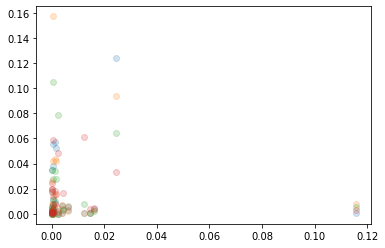

In [189]:
VIZINHOS = [3, 4, 6, 12]

for n in VIZINHOS:
    
    modelo_knn = KNeighborsRegressor(n_neighbors=n) # cria um modelo

    modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino)) # treina o modelo

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_knn.predict(normalizador_x.transform(X_teste))
    
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) # Raiz quadrada do erro médio
    print(f"O RMSE do modelo k-NN usando k = {n}, para os dados normalizados foi de {RMSE}.")
    print()
    
    # Gráfico de desempenho
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.2)

O RMSE do modelo k-NN usando k = 1, para os dados normalizados, foi de 0.026519787585253474.

O RMSE do modelo k-NN usando k = 3, para os dados normalizados, foi de 0.03382389357649117.

O RMSE do modelo k-NN usando k = 7, para os dados normalizados, foi de 0.031125439427175557.

O RMSE do modelo k-NN usando k = 11, para os dados normalizados, foi de 0.028146650090740303.



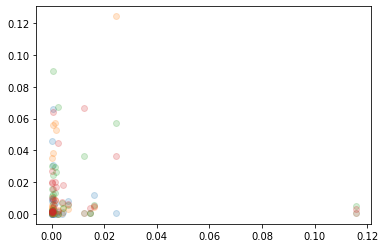

In [190]:
# número de vizinhos impares

VIZINHOS = [1, 3, 7, 11] 

for n in VIZINHOS:
    
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_knn.predict(normalizador_x.transform(X_teste))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k = {n}, para os dados normalizados, foi de {RMSE}.")
    print()
    
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.2)

### Segundo teste: Dados não normalizados

O RMSE do modelo k-NN usando k=3 foi de 763.2373020309408.

O RMSE do modelo k-NN usando k=4 foi de 640.55906151605.

O RMSE do modelo k-NN usando k=6 foi de 592.2140418177916.

O RMSE do modelo k-NN usando k=12 foi de 720.7450171206882.



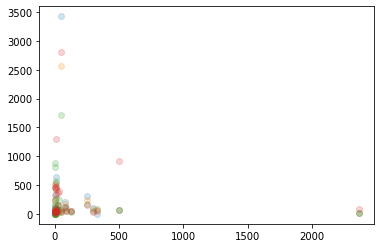

In [191]:
VIZINHOS = [3, 4, 6, 12]

for n in VIZINHOS:
    
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE}.")
    print()
    
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.2)

O RMSE do modelo k-NN usando k=1 foi de 1426.334621192693.

O RMSE do modelo k-NN usando k=3 foi de 763.2373020309408.

O RMSE do modelo k-NN usando k=7 foi de 548.9407023236157.

O RMSE do modelo k-NN usando k=11 foi de 741.4557612973797.



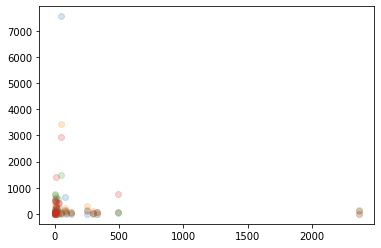

In [192]:
VIZINHOS = [1, 3, 7, 11]

for n in VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE}.")
    print()
    
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.2)

## 3. Regressão Linear 

### Primeiro teste: dados normalizados

O RMSE do modelo linear foi de 0.03533730667134907


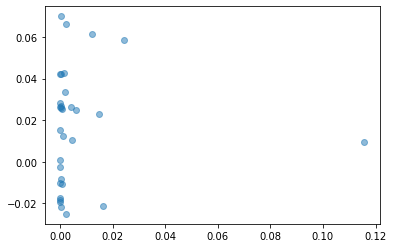

In [193]:
from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino),)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(normalizador_x.transform(X_treino))

# Raiz quadrada do erro médio
y_verdadeiro = normalizador_y.transform(y_teste)
y_previsao = modelo_linear.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo linear foi de {RMSE}")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

### Segundo teste: dados sem normalização 

O RMSE do modelo linear foi de 721.8705006823202.


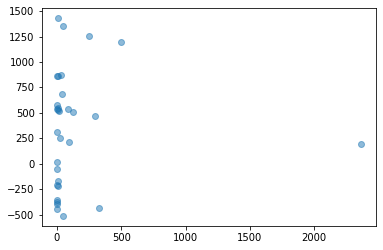

In [194]:
# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)

# Raiz quadrada do erro médio
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo linear foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

## 4. Árvore de decisão

### Primeiro teste: escolhendo hiperparâmetros

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.028644226612053767.

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.03767080336994236.

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.04146841183679821.

O RMSE do modelo AD usando max_leaf_nodes=3 e max_depth=None foi de 0.02074607914931531.

O RMSE do modelo AD usando max_leaf_nodes=3 e max_depth=5 foi de 0.02074607914931531.

O RMSE do modelo AD usando max_leaf_nodes=3 e max_depth=10 foi de 0.02074607914931531.

O RMSE do modelo AD usando max_leaf_nodes=12 e max_depth=None foi de 0.04236253367140273.

O RMSE do modelo AD usando max_leaf_nodes=12 e max_depth=5 foi de 0.04236253367140273.

O RMSE do modelo AD usando max_leaf_nodes=12 e max_depth=10 foi de 0.04236253367140273.



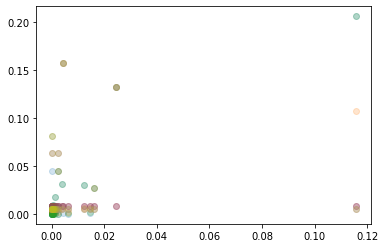

In [204]:
from itertools import product

NUM_FOLHAS = [None, 3, 12]
NUM_PROFUNDIDADE = [None, 5, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE}."
    )
    print()
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.2)

### Segundo teste: Dados normalizados 

O RMSE do modelo árvore de decisão, para os dados normalizados, foi de 0.02074607914931531.


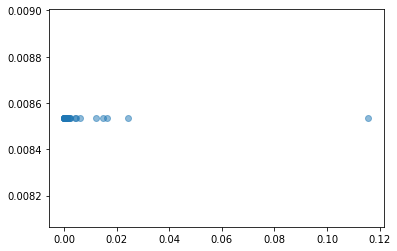

In [202]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(max_leaf_nodes=3, random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(normalizador_x.transform(X_teste))

# Raiz quadrada do erro médio
y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))
y_verdadeiro = normalizador_y.transform(y_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo árvore de decisão, para os dados normalizados, foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

### Terceiro teste: dados não normalizados 

O RMSE do modelo árvore de decisão foi de 772.4555312914883


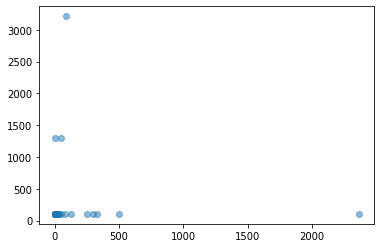

In [205]:
# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)

# Raiz quadrada do erro médio 
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo árvore de decisão foi de {RMSE}")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

### Grafo da árvore de decisão 

O RMSE do modelo AD usando max_leaf_nodes=3 foi de 0.043596283902456075


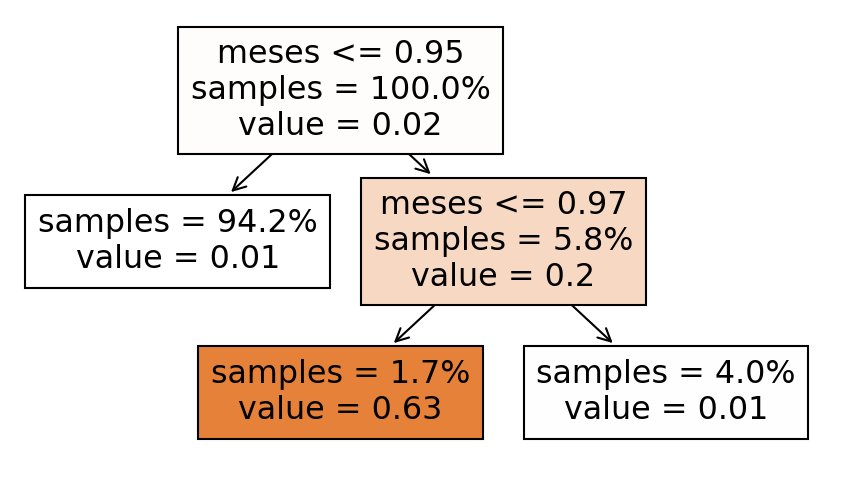

In [206]:
from matplotlib import pyplot as plt
from sklearn import tree

# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=3,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

y_verdadeiro = normalizador_y.transform(y_treino)
y_previsao = modelo_dt.predict(normalizador_x.transform(X_treino))
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print( f"O RMSE do modelo AD usando max_leaf_nodes={3} foi de {RMSE}")

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

## 5. Floresta Aleatória

### Primeiro teste: escolha de hiperparâmetros

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 362.70935000444246.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 376.12785722925526.

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 382.2902608254408.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 414.2213563570962.

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 378.52564390388454.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 413.870293742276.

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 370.2274716230662.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=3 foi de 407.65154406094376.



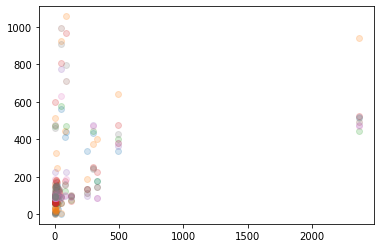

In [208]:
from itertools import product

NUM_ARVORES = [10, 100]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

# alterando o formato do target
y_treino2 = y_treino.ravel()
y_teste2 = y_teste.ravel()

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino2)

    y_verdadeiro = y_teste2
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE}."
    )
    print()
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.2)

### Segundo teste: dados não normalizados 

O RMSE do modelo árvore de decisão foi de 362.70935000444246.


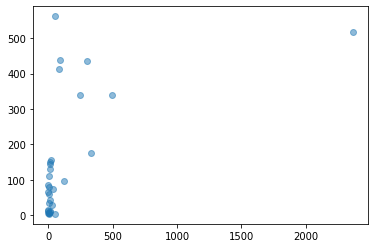

In [209]:
from sklearn.ensemble import RandomForestRegressor

# cria o modelo
modelo_rf = RandomForestRegressor(n_estimators=10, random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino2)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo árvore de decisão foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

### Importância das features

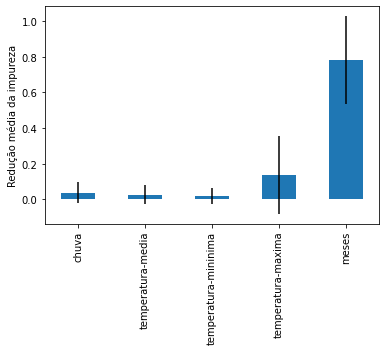

In [210]:
importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()